# Telecom Churn Prediction

**Author:** Sidharth_Rai 

## Problem Statement
### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br>

## Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Load the train, test, and sample submission files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('sample.csv')


# Display the first few rows of each dataset
print("Train DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())
print("\nSample Submission DataFrame:")
print(sample_submission_df.head())

Train DataFrame:
   id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0     

In [ ]:
sample = pd.read_csv('sample.csv')
sample.drop(['id'],axis=1,inplace=True)
y_test = sample['churn_probability'].to_list()

In [4]:
train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
for i in train_df.columns:
    print(i)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

In [7]:
for i in train_df.isnull().sum():
    print(i)

0
0
702
702
702
0
399
733
0
0
0
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
0
0
0
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
2768
2687
3703
0
0
0
2768
2687
3703
2768
2687
3703
2768
2687
3703
0
0
0
0
0
0
0
0
0
1101
1234
2461
0
0
0
52431
52134
51582
52431
52134
51582
52431
52134
51582
52431
52134
51582
52431
52134
51582
52431
52134
51582
0
0
0
0
0
0
52431
52134
51582
52431
52134
51582
52431
52134
51582
0
0
0
0
0
0
0
0
0
0
0
0
52431
52134
51582
0
0
0
0
0


# Exploratory Data Analysis

In [52]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)
# Reading the data
#Tele_data = pd.read_csv("telecom_churn_data.csv")
Tele_data=data

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [55]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [56]:
df.tail()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0
69998,69998,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,168.269,42.815,...,0,0,1.0,NaN,1.0,1876,0.00,0.00,0.00,0


In [57]:
df.shape

(69999, 172)

In [58]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [59]:
id_cols=[x for x in df.columns if 'id' in x]
amt_cols=[x for x in df.columns if 'amt' in x]
mou_cols=[x for x in df.columns if 'mou' in x]
date_cols=[x for x in df.columns if 'date' in x]
arpu_cols=['arpu_6','arpu_7','arpu_8']
aon_cols=['aon']
target_col=['churn_probability']
other_col=[x for x in list(df.columns) if x not in id_cols + amt_cols + mou_cols + date_cols + arpu_cols + aon_cols + target_col] 

In [60]:
print(df.shape)
print(len(id_cols)+len(amt_cols)+len(mou_cols)+len(date_cols)+len(arpu_cols)+len(aon_cols)+len(target_col)+len(other_col))

(69999, 172)
172


In [61]:
df[id_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         69999 non-null  int64
 1   circle_id  69999 non-null  int64
dtypes: int64(2)
memory usage: 1.1 MB


In [62]:
df[amt_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rech_amt_6    69999 non-null  int64  
 1   total_rech_amt_7    69999 non-null  int64  
 2   total_rech_amt_8    69999 non-null  int64  
 3   max_rech_amt_6      69999 non-null  int64  
 4   max_rech_amt_7      69999 non-null  int64  
 5   max_rech_amt_8      69999 non-null  int64  
 6   last_day_rch_amt_6  69999 non-null  int64  
 7   last_day_rch_amt_7  69999 non-null  int64  
 8   last_day_rch_amt_8  69999 non-null  int64  
 9   av_rech_amt_data_6  17568 non-null  float64
 10  av_rech_amt_data_7  17865 non-null  float64
 11  av_rech_amt_data_8  18417 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 6.4 MB


In [63]:
df[amt_cols].isnull().mean().sort_values(ascending=False)

av_rech_amt_data_6    0.749025
av_rech_amt_data_7    0.744782
av_rech_amt_data_8    0.736896
total_rech_amt_6      0.000000
total_rech_amt_7      0.000000
total_rech_amt_8      0.000000
max_rech_amt_6        0.000000
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
last_day_rch_amt_8    0.000000
dtype: float64

In [64]:
drop_amt_cols=list((df[amt_cols].isnull().mean()>0.7).index[(df[amt_cols].isnull().mean()>0.7)])
df=df.drop(columns=list((df[amt_cols].isnull().mean()>0.7).index[(df[amt_cols].isnull().mean()>0.7)]))
amt_cols = [item for item in amt_cols if item not in drop_amt_cols]
df[amt_cols].isnull().mean().sort_values(ascending=False)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
dtype: float64

In [65]:
df[mou_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 90 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_og_t2o_mou    69297 non-null  float64
 1   std_og_t2o_mou    69297 non-null  float64
 2   loc_ic_t2o_mou    69297 non-null  float64
 3   onnet_mou_6       67231 non-null  float64
 4   onnet_mou_7       67312 non-null  float64
 5   onnet_mou_8       66296 non-null  float64
 6   offnet_mou_6      67231 non-null  float64
 7   offnet_mou_7      67312 non-null  float64
 8   offnet_mou_8      66296 non-null  float64
 9   roam_ic_mou_6     67231 non-null  float64
 10  roam_ic_mou_7     67312 non-null  float64
 11  roam_ic_mou_8     66296 non-null  float64
 12  roam_og_mou_6     67231 non-null  float64
 13  roam_og_mou_7     67312 non-null  float64
 14  roam_og_mou_8     66296 non-null  float64
 15  loc_og_t2t_mou_6  67231 non-null  float64
 16  loc_og_t2t_mou_7  67312 non-null  float6

In [66]:
df[mou_cols].isnull().mean().sort_values(ascending=False)

isd_ic_mou_8        0.052901
loc_og_mou_8        0.052901
std_og_t2c_mou_8    0.052901
loc_ic_mou_8        0.052901
loc_og_t2f_mou_8    0.052901
                      ...   
total_ic_mou_7      0.000000
total_ic_mou_6      0.000000
total_og_mou_7      0.000000
total_og_mou_8      0.000000
total_og_mou_6      0.000000
Length: 90, dtype: float64

In [67]:
# Replacing Null values with 0 since all the columns are related to minute of usage if there is null that means no usage
df[mou_cols]=df[mou_cols].fillna(0)
df[mou_cols].isnull().mean().sort_values(ascending=False)

loc_og_t2o_mou      0.0
std_ic_t2t_mou_7    0.0
loc_ic_mou_8        0.0
loc_ic_mou_7        0.0
loc_ic_mou_6        0.0
                   ... 
loc_og_mou_7        0.0
loc_og_mou_6        0.0
loc_og_t2c_mou_8    0.0
loc_og_t2c_mou_7    0.0
isd_ic_mou_8        0.0
Length: 90, dtype: float64

In [68]:
df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      69999 non-null  object
 1   last_date_of_month_7      69600 non-null  object
 2   last_date_of_month_8      69266 non-null  object
 3   date_of_last_rech_6       68898 non-null  object
 4   date_of_last_rech_7       68765 non-null  object
 5   date_of_last_rech_8       67538 non-null  object
 6   date_of_last_rech_data_6  17568 non-null  object
 7   date_of_last_rech_data_7  17865 non-null  object
 8   date_of_last_rech_data_8  18417 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB


In [69]:
for col in date_cols:
    df[col]=pd.to_datetime(df[col], errors='coerce')

In [70]:
df[date_cols].isnull().mean().sort_values(ascending=False)

date_of_last_rech_data_6    0.749025
date_of_last_rech_data_7    0.744782
date_of_last_rech_data_8    0.736896
date_of_last_rech_8         0.035158
date_of_last_rech_7         0.017629
date_of_last_rech_6         0.015729
last_date_of_month_8        0.010472
last_date_of_month_7        0.005700
last_date_of_month_6        0.000000
dtype: float64

In [71]:
df=df.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'])
date_cols=[x for x in df.columns if 'date' in x]
date_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [72]:
# Creating function to create derived column from date 
# This function assignes value to group if a person has done last recharge between 1 to 10 then it will be assign to group = date_of_last_rech_6_10
# It will drop the date column
# It will also create dummy variables 

def date_handling(df):
    date_cols=[x for x in df.columns if 'date' in x]
    for x in date_cols:
        day=x+'_day'
        df[day]= df[x].dt.day

# Apply conditions to create the 'group' column
        group=x+'_group'
        
        df[group] = pd.cut(df[day],bins=[0, 10, 20, 31,float('inf')],labels=[x+'_10', x+'_20', x+'_31', x+'_other'],right=True)
# Handling the case for NaT (missing dates) = df[group].cat.add_categories(['Other']).fillna('Other')
        df[group]=df[group].astype(str)
        df[group]=df[group].replace('nan','Other')
        df[group]=df[group].astype(str)
        df=df.drop(columns=[x,day])
    return pd.get_dummies(df, columns=['date_of_last_rech_6_group','date_of_last_rech_7_group','date_of_last_rech_8_group'],drop_first=True,dtype=int)

In [73]:
df=date_handling(df)
date_cols=[x for x in df.columns if 'date' in x]
date_cols

['date_of_last_rech_6_group_date_of_last_rech_6_10',
 'date_of_last_rech_6_group_date_of_last_rech_6_20',
 'date_of_last_rech_6_group_date_of_last_rech_6_31',
 'date_of_last_rech_7_group_date_of_last_rech_7_10',
 'date_of_last_rech_7_group_date_of_last_rech_7_20',
 'date_of_last_rech_7_group_date_of_last_rech_7_31',
 'date_of_last_rech_8_group_date_of_last_rech_8_10',
 'date_of_last_rech_8_group_date_of_last_rech_8_20',
 'date_of_last_rech_8_group_date_of_last_rech_8_31']

In [74]:
df[date_cols].head()

,date_of_last_rech_6_group_date_of_last_rech_6_10,date_of_last_rech_6_group_date_of_last_rech_6_20,date_of_last_rech_6_group_date_of_last_rech_6_31,date_of_last_rech_7_group_date_of_last_rech_7_10,date_of_last_rech_7_group_date_of_last_rech_7_20,date_of_last_rech_7_group_date_of_last_rech_7_31,date_of_last_rech_8_group_date_of_last_rech_8_10,date_of_last_rech_8_group_date_of_last_rech_8_20,date_of_last_rech_8_group_date_of_last_rech_8_31
0,0,0,1,1,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1
2,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1


In [75]:
df[arpu_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   arpu_6  69999 non-null  float64
 1   arpu_7  69999 non-null  float64
 2   arpu_8  69999 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [76]:
df[aon_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   aon     69999 non-null  int64
dtypes: int64(1)
memory usage: 547.0 KB


In [77]:
df[target_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   churn_probability  69999 non-null  int64
dtypes: int64(1)
memory usage: 547.0 KB


In [78]:
df[other_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   og_others_6        67231 non-null  float64
 1   og_others_7        67312 non-null  float64
 2   og_others_8        66296 non-null  float64
 3   ic_others_6        67231 non-null  float64
 4   ic_others_7        67312 non-null  float64
 5   ic_others_8        66296 non-null  float64
 6   total_rech_num_6   69999 non-null  int64  
 7   total_rech_num_7   69999 non-null  int64  
 8   total_rech_num_8   69999 non-null  int64  
 9   total_rech_data_6  17568 non-null  float64
 10  total_rech_data_7  17865 non-null  float64
 11  total_rech_data_8  18417 non-null  float64
 12  max_rech_data_6    17568 non-null  float64
 13  max_rech_data_7    17865 non-null  float64
 14  max_rech_data_8    18417 non-null  float64
 15  count_rech_2g_6    17568 non-null  float64
 16  count_rech_2g_7    178

In [79]:
df[other_col].isnull().mean().sort_values(ascending=False).head(30)

arpu_3g_6            0.749025
max_rech_data_6      0.749025
arpu_2g_6            0.749025
night_pck_user_6     0.749025
fb_user_6            0.749025
count_rech_3g_6      0.749025
total_rech_data_6    0.749025
count_rech_2g_6      0.749025
arpu_2g_7            0.744782
count_rech_3g_7      0.744782
count_rech_2g_7      0.744782
arpu_3g_7            0.744782
max_rech_data_7      0.744782
total_rech_data_7    0.744782
night_pck_user_7     0.744782
fb_user_7            0.744782
total_rech_data_8    0.736896
max_rech_data_8      0.736896
count_rech_2g_8      0.736896
night_pck_user_8     0.736896
count_rech_3g_8      0.736896
arpu_2g_8            0.736896
fb_user_8            0.736896
arpu_3g_8            0.736896
ic_others_8          0.052901
og_others_8          0.052901
og_others_6          0.039543
ic_others_6          0.039543
og_others_7          0.038386
ic_others_7          0.038386
dtype: float64

In [80]:
drop_list=list((df[other_col].isnull().mean()>0.7).index[(df[other_col].isnull().mean()>0.7)])
df=df.drop(columns=list((df[other_col].isnull().mean()>0.7).index[(df[other_col].isnull().mean()>0.7)]))
other_col = [item for item in other_col if item not in drop_list]
other_col

['og_others_6',
 'og_others_7',
 'og_others_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [81]:
df[other_col]=df[other_col].fillna(0)
df[other_col].isnull().mean().sort_values(ascending=False)

og_others_6         0.0
og_others_7         0.0
jul_vbc_3g          0.0
aug_vbc_3g          0.0
sachet_3g_8         0.0
sachet_3g_7         0.0
sachet_3g_6         0.0
monthly_3g_8        0.0
monthly_3g_7        0.0
monthly_3g_6        0.0
sachet_2g_8         0.0
sachet_2g_7         0.0
sachet_2g_6         0.0
monthly_2g_8        0.0
monthly_2g_7        0.0
monthly_2g_6        0.0
vol_3g_mb_8         0.0
vol_3g_mb_7         0.0
vol_3g_mb_6         0.0
vol_2g_mb_8         0.0
vol_2g_mb_7         0.0
vol_2g_mb_6         0.0
total_rech_num_8    0.0
total_rech_num_7    0.0
total_rech_num_6    0.0
ic_others_8         0.0
ic_others_7         0.0
ic_others_6         0.0
og_others_8         0.0
jun_vbc_3g          0.0
dtype: float64

In [82]:
df=df.drop(columns=id_cols)

In [83]:
df[amt_cols].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,63.426949,59.294218,62.489478
std,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,97.954876,95.429492,101.996729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000
50%,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,30.000000,30.000000,30.000000
75%,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,110.000000,110.000000,130.000000
max,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,4010.000000,3100.000000,4449.000000


In [84]:
df[mou_cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.0,0.0,0.0,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,...,31.327231,199.710640,201.878029,198.486034,0.059483,0.032090,0.038255,7.101776,7.857501,7.906786
std,0.0,0.0,0.0,295.115497,306.326345,304.990552,312.900706,318.492632,318.453812,56.260778,...,105.821097,290.114823,296.771338,288.336731,0.161981,0.134813,0.144721,59.751263,62.391193,61.434341
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,5.430000,4.910000,4.110000,28.790000,26.690000,23.780000,0.000000,...,0.000000,38.640000,41.340000,38.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,30.830000,29.160000,27.840000,89.810000,85.590000,83.010000,0.000000,...,4.680000,114.780000,116.330000,114.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,113.100000,108.940000,106.280000,223.540000,218.350000,216.410000,0.000000,...,25.510000,251.070000,249.470000,249.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,2850.980000,...,5658.740000,7716.140000,9699.010000,10830.380000,19.760000,13.460000,16.860000,6789.410000,5289.540000,4127.010000


In [85]:
df[arpu_cols].describe()

,arpu_6,arpu_7,arpu_8
count,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826
std,334.213918,344.366927,351.924315
min,-2258.709000,-1289.715000,-945.808000
25%,93.581000,86.714000,84.095000
50%,197.484000,191.588000,192.234000
75%,370.791000,365.369500,369.909000
max,27731.088000,35145.834000,33543.624000


In [86]:
df[aon_cols].describe()

,aon
count,69999.000000
mean,1220.639709
std,952.426321
min,180.000000
25%,468.000000
50%,868.000000
75%,1813.000000
max,4337.000000


In [87]:
df[other_col].describe()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000
mean,0.444289,0.023487,0.031310,0.820291,0.980539,0.912259,7.566522,7.706667,7.224932,51.773924,...,0.449492,0.075815,0.077730,0.081958,0.075344,0.081444,0.085487,68.108597,65.935830,60.07674
std,4.674074,1.683170,2.172704,11.907671,12.970528,11.386111,7.041452,7.050614,7.195597,212.513909,...,1.632450,0.358905,0.383189,0.381821,0.573003,0.634547,0.680035,269.328659,267.899034,257.22681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,10.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,800.890000,270.240000,394.930000,1362.940000,1495.940000,1209.860000,170.000000,138.000000,138.000000,10285.900000,...,44.000000,9.000000,16.000000,16.000000,29.000000,33.000000,41.000000,12916.220000,9165.600000,11166.21000


In [88]:
df[amt_cols].nunique()

total_rech_amt_6      2108
total_rech_amt_7      2147
total_rech_amt_8      2149
max_rech_amt_6         190
max_rech_amt_7         178
max_rech_amt_8         202
last_day_rch_amt_6     179
last_day_rch_amt_7     166
last_day_rch_amt_8     191
dtype: int64

In [89]:
df[mou_cols].nunique().sort_values(ascending=True).head(15)

loc_og_t2o_mou         1
std_og_t2c_mou_8       1
std_og_t2c_mou_7       1
std_og_t2c_mou_6       1
std_ic_t2o_mou_6       1
std_ic_t2o_mou_8       1
std_ic_t2o_mou_7       1
loc_ic_t2o_mou         1
std_og_t2o_mou         1
spl_ic_mou_6          78
spl_ic_mou_8          95
spl_ic_mou_7         103
isd_og_mou_8        1008
isd_og_mou_7        1084
isd_og_mou_6        1103
dtype: int64

In [90]:
drop_mou_cols=list((df[mou_cols].nunique().sort_values(ascending=True).head(15)==1).index[(df[mou_cols].nunique().sort_values(ascending=True).head(15)==1)])
df.drop(columns=drop_mou_cols)
mou_cols=[x for x in mou_cols if x not in drop_mou_cols]
df[mou_cols].nunique().sort_values(ascending=True).head(15)

spl_ic_mou_6          78
spl_ic_mou_8          95
spl_ic_mou_7         103
isd_og_mou_8        1008
isd_og_mou_7        1084
isd_og_mou_6        1103
loc_og_t2c_mou_6    1945
std_og_t2f_mou_8    1945
std_og_t2f_mou_7    1991
std_og_t2f_mou_6    2074
loc_og_t2c_mou_7    2103
loc_og_t2c_mou_8    2204
std_ic_t2f_mou_8    2583
std_ic_t2f_mou_6    2624
std_ic_t2f_mou_7    2695
dtype: int64

In [91]:
df[arpu_cols].nunique()

arpu_6    61615
arpu_7    61425
arpu_8    60194
dtype: int64

In [92]:
df[aon_cols].nunique()

aon    3455
dtype: int64

In [93]:
df[other_col].nunique().sort_values(ascending=True).head(15)

monthly_2g_6         5
monthly_2g_8         6
monthly_2g_7         6
monthly_3g_6        10
monthly_3g_8        12
monthly_3g_7        13
sachet_3g_6         23
sachet_3g_7         26
sachet_3g_8         28
sachet_2g_6         30
sachet_2g_8         32
sachet_2g_7         33
total_rech_num_8    92
total_rech_num_6    94
total_rech_num_7    96
dtype: int64

In [94]:
df.isnull().mean().sort_values(ascending=False)

loc_og_t2o_mou                                      0.0
ic_others_8                                         0.0
spl_ic_mou_8                                        0.0
isd_ic_mou_6                                        0.0
isd_ic_mou_7                                        0.0
                                                   ... 
isd_og_mou_6                                        0.0
isd_og_mou_7                                        0.0
isd_og_mou_8                                        0.0
spl_og_mou_6                                        0.0
date_of_last_rech_8_group_date_of_last_rech_8_31    0.0
Length: 143, dtype: float64

# Filter high-value customers
## Define high-value customers as follows:
- I will consider the customer who has avg arpu greator than 70th percentile of the average recharge amount.

In [98]:
df['avg_arpu']=(df['arpu_6']+df['arpu_6']+df['arpu_6'])/3

In [99]:
print("Recharge amount at 70th percentile: {0}".format(df.avg_arpu.quantile(0.7)))

Recharge amount at 70th percentile: 323.9982


In [100]:
high_val_cust = df.loc[df.avg_arpu > df.avg_arpu.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(21000, 144)

In [101]:
# delete variables created to filter high-value customers
high_val_cust = high_val_cust.drop(['avg_arpu'], axis=1)
high_val_cust.shape

(21000, 143)

In [102]:
high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Columns: 143 entries, loc_og_t2o_mou to date_of_last_rech_8_group_date_of_last_rech_8_31
dtypes: float64(108), int32(9), int64(26)
memory usage: 22.2 MB


In [103]:
#  total incoming and outgoing minutes of usage
high_val_cust['total_calls_mou_8'] = high_val_cust.total_ic_mou_8 + high_val_cust.total_og_mou_8

In [104]:
#     2g and 3g data consumption
high_val_cust['total_internet_mb_8'] =  high_val_cust.vol_2g_mb_8 + high_val_cust.vol_3g_mb_8

In [105]:
high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_8 == 0 and row.total_internet_mb_8 == 0) else 0, axis=1)

In [106]:
high_val_cust[['churn','total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']]

,churn,total_ic_mou_8,total_og_mou_8,vol_2g_mb_8,vol_3g_mb_8
0,0,17.31,3.14,0.00,0.0
1,0,26.99,687.41,0.00,0.0
2,0,369.53,227.41,0.00,0.0
3,0,629.94,391.53,354.35,0.0
4,0,203.29,387.81,0.00,0.0
...,...,...,...,...,...
20995,0,98.06,474.51,0.00,0.0
20996,0,366.89,242.69,0.00,0.0
20997,0,551.36,1099.61,0.00,0.0
20998,0,318.86,915.38,0.00,0.0


In [107]:
month_8_cols = high_val_cust.columns[high_val_cust.columns.str.endswith(pat = '_8')]
month_8_cols

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'total_calls_mou_8',
       'total_internet_mb_8'],
      dtype='object')

In [108]:
high_val_cust = high_val_cust.drop(['total_calls_mou_8', 'total_internet_mb_8'], axis=1)

In [109]:
high_val_cust.churn = high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

Churn Ratio:
0    91.061905
1     8.938095
Name: churn, dtype: float64


In [110]:
high_val_cust['arpu_diff'] = high_val_cust.arpu_7 - high_val_cust.arpu_6 

high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)

high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)

high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)

high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)

high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)

high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)

high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)

high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)

high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)

high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)

high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)

high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)

high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)

high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)

high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)

high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)

high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)

high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)

high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

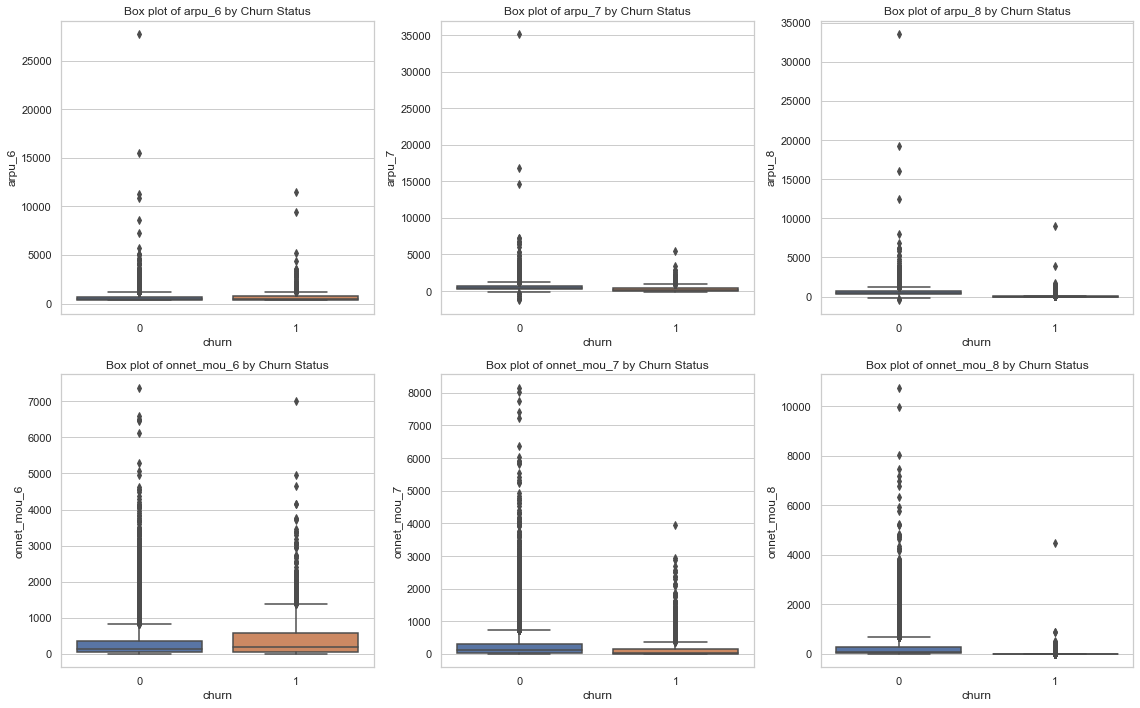

In [111]:
sns.set(style="whitegrid")

# Select a subset of relevant features for the box plots and correlation heatmap
# For simplicity, we'll use the first few numeric columns along with the churn column
features_to_plot = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'churn']

# Box plots to visualize the distribution of these features, separated by churn status
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_plot[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='churn', y=feature, data=high_val_cust)
    plt.title(f'Box plot of {feature} by Churn Status')

plt.tight_layout()
plt.show()

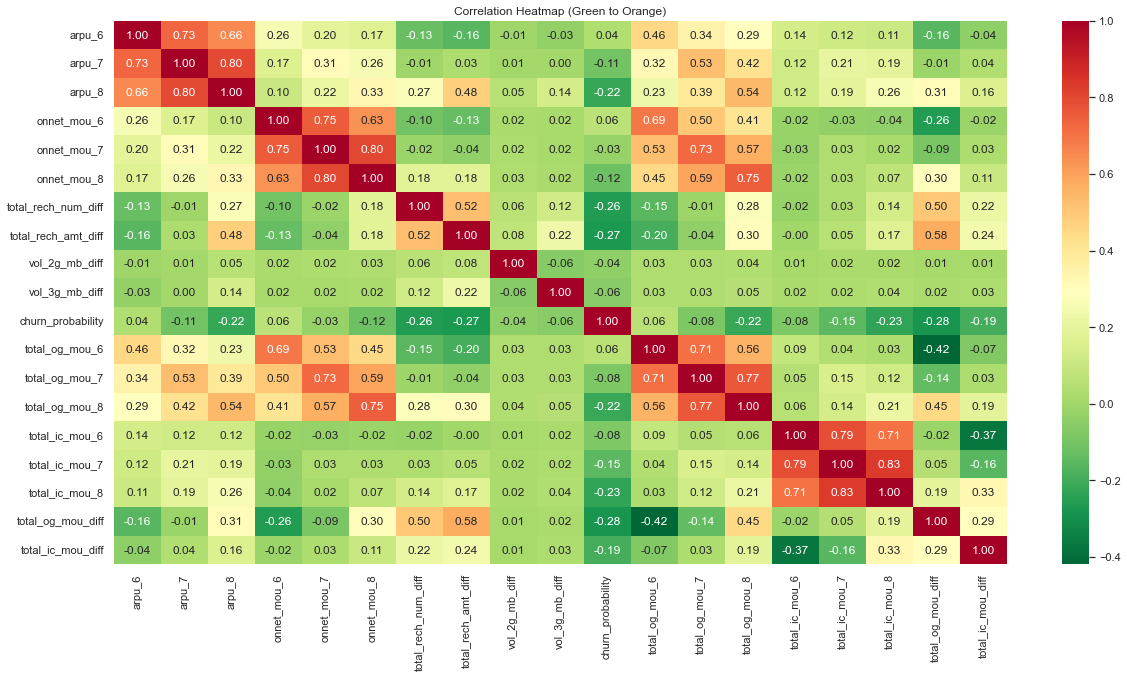

In [112]:
# Generating Heat map for high value generating customer to check correlation
plt.figure(figsize=(20, 10))
mou_total = [col for col in high_val_cust.columns if 'mou' in col.lower() and 'total' in col.lower()]
correlation_matrix = high_val_cust[['arpu_6', 'arpu_7', 'arpu_8','onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','total_rech_num_diff', 'total_rech_amt_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff','churn','churn_probability']+mou_total].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn_r', cbar=True)
plt.title('Correlation Heatmap (Green to Orange)')
plt.show()

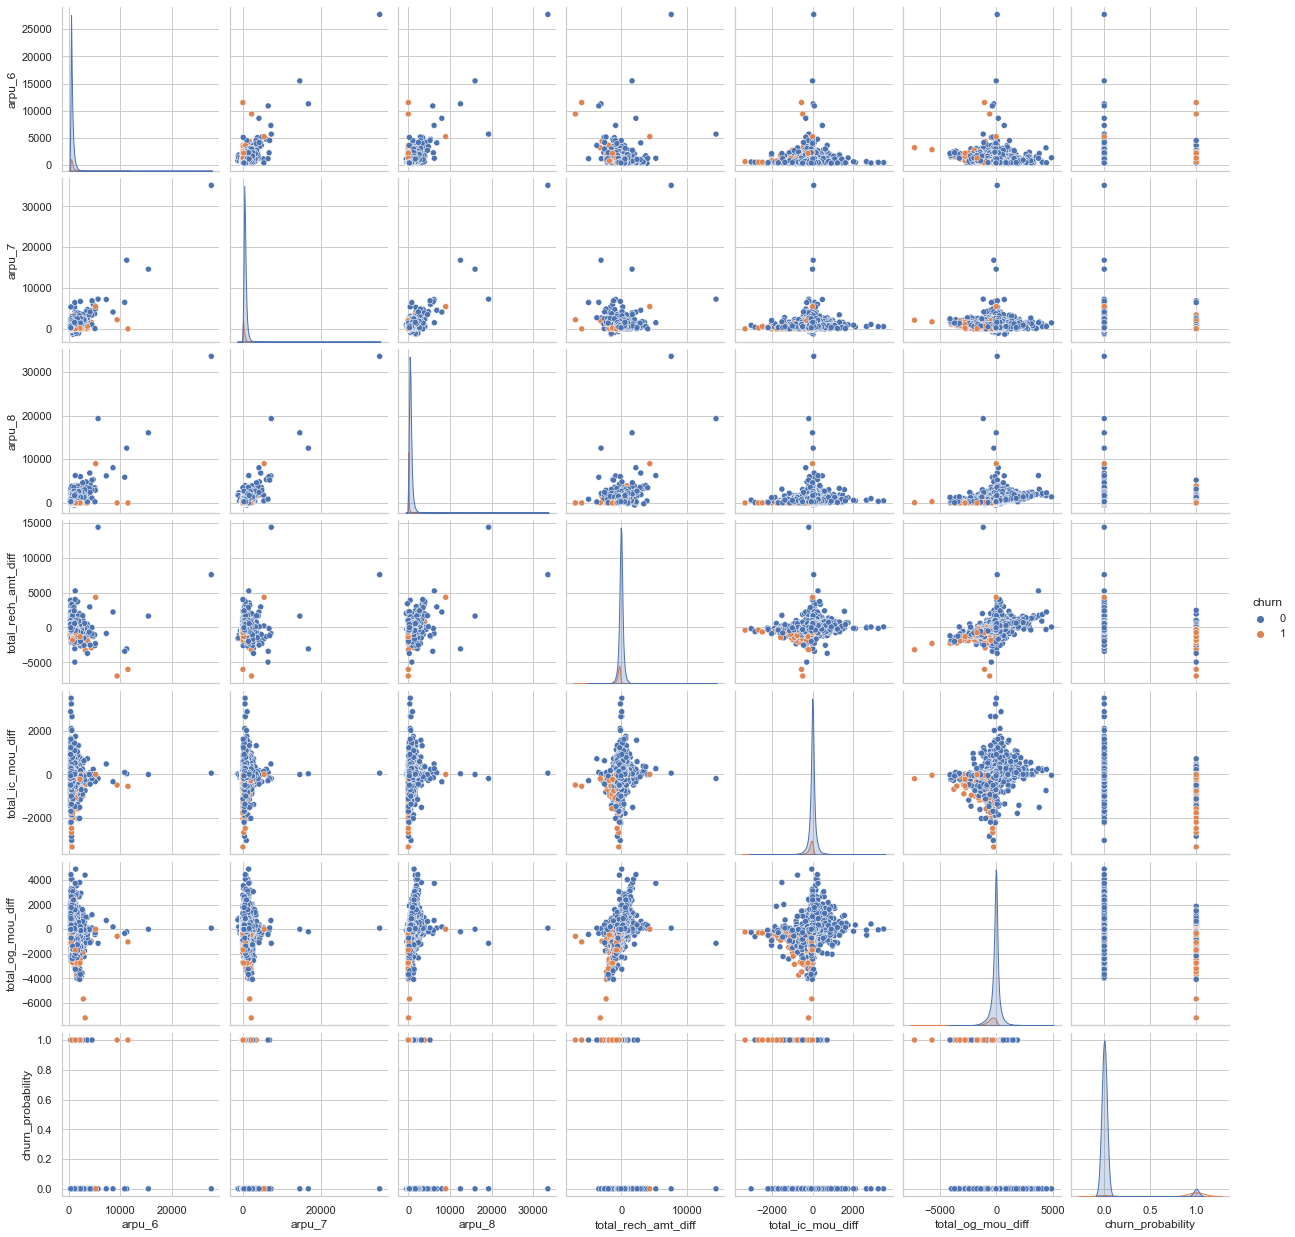

In [113]:
selected_for_pairplot = [
    'arpu_6', 'arpu_7', 'arpu_8', 
    'total_rech_amt_diff', 'total_ic_mou_diff', 
    'total_og_mou_diff', 'churn', 'churn_probability'
]

sns.pairplot(high_val_cust[selected_for_pairplot], hue='churn')
plt.show()

In [114]:
# Contunuing with Actual data for model creation purpose

In [115]:
# We can see almost every column has outlier in it lets remove them by using k-sigma

# Define the K value (e.g., 3 for 3-sigma)
k = 3

# Function to impute outliers using the K-Sigma method
def k_sigma_impute(df, k=3):
    df_imputed = df.copy()
    numerical_columns = df_imputed.select_dtypes(include=[np.number]).columns
    
    for col in numerical_columns:
        mean = df_imputed[col].mean()
        sigma = df_imputed[col].std()
        
        # Define the upper and lower bounds
        upper_bound = mean + k * sigma
        lower_bound = mean - k * sigma
        
        # Identify outliers
        outliers = (df_imputed[col] > upper_bound) | (df_imputed[col] < lower_bound)
        
        # Impute outliers with the mean or median (here we use the mean)
        df_imputed.loc[outliers, col] = mean  # You can use df_imputed[col].median() if preferred
    
    return df_imputed

# Apply the K-Sigma imputation to the dataset
data_imputed = k_sigma_impute(df, k=3)

# Display the dataset with outliers imputed
data_imputed.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,date_of_last_rech_6_group_date_of_last_rech_6_10,date_of_last_rech_6_group_date_of_last_rech_6_20,date_of_last_rech_6_group_date_of_last_rech_6_31,date_of_last_rech_7_group_date_of_last_rech_7_10,date_of_last_rech_7_group_date_of_last_rech_7_20,date_of_last_rech_7_group_date_of_last_rech_7_31,date_of_last_rech_8_group_date_of_last_rech_8_10,date_of_last_rech_8_group_date_of_last_rech_8_20,date_of_last_rech_8_group_date_of_last_rech_8_31,avg_arpu
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0.0,0.0,1.0,0.030258,0.0,0.0,0.0,0.0,1.0,31.277
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,0.0,1.0,0.0,0.030258,0.0,0.0,0.0,0.0,1.0,0.000
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,60.806
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,156.362
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,240.708


In [116]:
data_imputed.isnull().mean().sort_values(ascending=False)

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
spl_ic_mou_8      0.0
isd_ic_mou_6      0.0
isd_ic_mou_7      0.0
                 ... 
isd_og_mou_6      0.0
isd_og_mou_7      0.0
isd_og_mou_8      0.0
spl_og_mou_6      0.0
avg_arpu          0.0
Length: 144, dtype: float64

In [117]:
target = 'churn_probability'
features = data_imputed.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(features, data_imputed[target], test_size=0.2, random_state=123)

# 2. Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Apply PCA
# Define the number of components you want to keep
n_components = 96  # You can adjust this number based on your needs

pca = PCA(n_components=n_components,random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Combine the PCA-transformed data with the target variable for easier use later
train_set_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
train_set_pca[target] = y_train.reset_index(drop=True)

test_set_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])
test_set_pca[target] = y_test.reset_index(drop=True)

In [118]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.13952171 0.07160289 0.04346914 0.0352953  0.0300785  0.02775236
 0.02284424 0.01850613 0.01811988 0.01721762 0.01618862 0.01591903
 0.01493438 0.01397103 0.01367761 0.01324289 0.01214159 0.01178783
 0.01135445 0.01103694 0.01054498 0.01017665 0.00991173 0.00955497
 0.00932488 0.00894087 0.00875198 0.00860656 0.00834019 0.00820699
 0.00808477 0.00782486 0.00774084 0.00772718 0.00756838 0.00750505
 0.00729237 0.00705802 0.00687274 0.00659212 0.00639812 0.00637443
 0.0063441  0.00607339 0.00600875 0.005935   0.00588359 0.0057455
 0.00566547 0.00547426 0.00538388 0.00534714 0.00523589 0.00512369
 0.00507639 0.00487833 0.00482521 0.00475918 0.00471118 0.0045921
 0.00454624 0.0044646  0.00444438 0.00440542 0.00434651 0.0042207
 0.00413485 0.00397862 0.0039013  0.00386397 0.00381991 0.00372813
 0.00372416 0.00363465 0.00358731 0.0034912  0.00345245 0.00335396
 0.00334388 0.0032543  0.00316273 0.00311841 0.00310273 0.00303334
 0.00297053 0.00288877 0.00285279 0.00284703 0.00281779 0.0027938

In [8]:
def handle_missing_values(df):
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Calculate the number of missing values
        missing_count = df[column].isnull().sum()

        # If missing values exceed 5000, drop the column
        if missing_count > 5000:
            df.drop(columns=[column], inplace=True)
        else:
            # If missing values are less than 5000
            if df[column].dtype == 'object':
                # If the column is categorical, fill with mode
                df[column].fillna(df[column].mode()[0], inplace=True)
            else:
                # If the column is numerical
                if df[column].nunique() > 10:  # Assume more than 10 unique values as numerical
                    # Check for outliers using the IQR method
                    Q1 = df[column].quantile(0.25)
                    Q3 = df[column].quantile(0.75)
                    IQR = Q3 - Q1
                    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
                    
                    if outliers > 0:
                        # If outliers exist, fill with median
                        df[column].fillna(df[column].median(), inplace=True)
                    else:
                        # If no outliers, fill with mean
                        df[column].fillna(df[column].mean(), inplace=True)
                else:
                    # For columns with fewer unique values, treat as categorical
                    df[column].fillna(df[column].mode()[0], inplace=True)

    return df

In [9]:
handle_missing_values(train_df)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,0,0,0,1,0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,0,0,0,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,0,0,0,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,1,1,0,0,0,277,664.25,1402.96,990.97,0


In [10]:
train_df.isnull().sum()

id                   0
circle_id            0
loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 142, dtype: int64

In [11]:
train_df.select_dtypes(include="object")

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014
...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014


# Model building

Let's build a quick model with logistic regression and the first 2 PCA components.

In [12]:
train_df.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',"date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"], axis=1, inplace=True)

In [13]:
test_df.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',"date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"], axis=1, inplace=True)

In [14]:
train_df

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,...,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,...,1,0,0,0,0,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,...,0,0,0,0,0,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,...,0,0,0,0,0,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,...,0,0,0,1,0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,109,0.0,0.0,0.0,15.760,410.924,329.136,0.00,7.36,...,0,0,0,1,0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,160.083,289.129,265.772,116.54,196.46,...,0,0,0,0,0,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,372.088,258.374,279.782,77.13,68.44,...,0,0,0,0,0,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,238.575,245.414,145.062,14.01,7.64,...,1,1,0,0,0,277,664.25,1402.96,990.97,0


In [15]:
handle_missing_values(train_df)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,...,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,...,1,0,0,0,0,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,...,0,0,0,0,0,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,...,0,0,0,0,0,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,...,0,0,0,1,0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,109,0.0,0.0,0.0,15.760,410.924,329.136,0.00,7.36,...,0,0,0,1,0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,160.083,289.129,265.772,116.54,196.46,...,0,0,0,0,0,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,372.088,258.374,279.782,77.13,68.44,...,0,0,0,0,0,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,238.575,245.414,145.062,14.01,7.64,...,1,1,0,0,0,277,664.25,1402.96,990.97,0


In [16]:
handle_missing_values(test_df)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,...,0,0,0,0,0,0,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,...,0,0,0,0,0,0,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,329.844,434.884,746.239,7.54,7.86,...,0,0,0,0,0,0,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,43.550,171.390,24.400,5.31,2.16,...,0,0,0,0,0,0,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,306.854,406.289,413.329,450.93,609.03,...,0,0,0,0,0,0,462,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99994,109,0.0,0.0,0.0,718.870,396.259,406.150,324.46,250.01,...,0,0,0,0,0,0,1255,3.71,105.64,61.48
29996,99995,109,0.0,0.0,0.0,218.327,324.070,374.981,263.79,467.24,...,0,1,0,0,0,0,2258,0.00,0.00,0.00
29997,99996,109,0.0,0.0,0.0,139.473,38.230,180.194,11.08,14.89,...,0,0,0,0,0,0,440,0.00,0.00,0.00
29998,99997,109,0.0,0.0,0.0,1122.912,781.121,257.439,122.74,50.23,...,0,0,0,0,0,0,810,0.00,0.00,0.00


In [17]:
# Assuming 'target' is the column to predict
X_train = train_df.drop(columns=['churn_probability'])
y_train = train_df['churn_probability']

# Apply similar preprocessing to test_df if required
X_test = test_df.copy()  # For prediction later


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Example preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
X_train

In [22]:
step = [('scaler', StandardScaler()),("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# compiling
logistic = Pipeline(step)

# hyperparameter
param = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# 5 folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch
model = GridSearchCV(estimator = logistic, cv = fold, param_grid = param, scoring = 'roc_auc', n_jobs = -1,verbose = 1)

In [23]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [24]:
print("Best Parameters: ", model.best_params_)
print("Best Cross-Validation Score: ", model.best_score_)

Best Parameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}
Best Cross-Validation Score:  0.910589035795847


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
# from imblearn.metrics import sensitivity_specificity_support
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
cm = confusion_matrix(y_test, y_pred)

# # checking sensitivity and specificity
# # sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# # print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# # checking area under curve
# y_pred_prob = model.predict_proba(X_test)[:, 1]
# # print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

In [27]:
TN, FP, FN, TP = cm.ravel()

In [28]:
# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)
print("Specificity:", specificity)


Sensitivity: nan
Specificity: 0.7770666666666667


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling and RandomForest
steps = [('scaler', StandardScaler()), 
         ('rf', RandomForestClassifier(random_state=4))]

pipeline = Pipeline(steps)


In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define hyperparameters for Random Forest
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10, 20],
    'rf__max_features': ['auto', 'sqrt', 'log2', 0.5]
}

# Create a StratifiedKFold object for cross-validation
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           cv=fold, 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=1)


In [48]:
# Assuming X_train and y_train are your training features and target variable
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__n_estimators': 100}
Best Score: 0.9351336839314068


In [50]:
import pandas as pd

# Convert y_pred to a DataFrame
pred_df = pd.DataFrame(y_pred, columns=['Predictions'])

# Optionally, you can include the corresponding test data or indices
test_data_with_predictions = pd.concat([X_test.reset_index(drop=True), pred_df], axis=1)


In [51]:
# Save the DataFrame to an Excel file
test_data_with_predictions.to_excel('predictions_output.xlsx', index=False)


In [49]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
cm = confusion_matrix(y_test, y_pred)


In [43]:
TN, FP, FN, TP = cm.ravel()

In [44]:
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)
print("Specificity:", specificity)

Sensitivity: nan
Specificity: 0.7770666666666667


In [42]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters for Decision Tree

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=4))
])

param_grid = {
    'dt__criterion': ['entropy'],
    'dt__max_depth': [None, 10, 20],
    'dt__min_samples_split': [2, 5],
    'dt__min_samples_leaf': [1, 2]
}

# Create a StratifiedKFold object for cross-validation
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           cv=fold, 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=1)



# Use the best model to make predictions and evaluate



In [41]:
# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 5}
Best Score: 0.879304463164981


In [45]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
cm = confusion_matrix(y_test, y_pred)


In [125]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def model_pipeline(X_train, y_train, X_test, model_type='logistic', output_file='predictions_output.xlsx'):
    # Define the pipeline steps
    if model_type == 'logistic':
        steps = [('scaler', StandardScaler()), 
                 ('logistic', LogisticRegression(class_weight={0:0.1, 1:0.9}, random_state=4))]
        param_grid = {
            'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
            'logistic__penalty': ['l1', 'l2']
        }
    elif model_type == 'random_forest':
        steps = [('scaler', StandardScaler()), 
                 ('rf', RandomForestClassifier(random_state=4))]
        param_grid = {
            'rf__n_estimators': [50, 100],
            'rf__max_depth': [None, 10, 20],
            'rf__max_features': ['auto', 'sqrt', 'log2', 0.5]
        }
    
    # Create the pipeline
    pipeline = Pipeline(steps)
    
    # Setup cross-validation
    fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
    
    # Create GridSearchCV
    grid_search = GridSearchCV(estimator=pipeline, 
                               param_grid=param_grid, 
                               cv=fold, 
                               scoring='roc_auc', 
                               n_jobs=-1, 
                               verbose=1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    
    # Make predictions
    y_pred = grid_search.predict(X_test)
    
    # Convert predictions to DataFrame and save to Excel
    pred_df = pd.DataFrame(y_pred, columns=['Predictions'])
    test_data_with_predictions = pd.concat([X_test.reset_index(drop=True), pred_df], axis=1)
    test_data_with_predictions.to_excel(output_file, index=False)
    
    print(f"Predictions saved to {output_file}")

# Example usage
# model_pipeline(X_train, y_train, X_test, model_type='logistic')
# model_pipeline(X_train, y_train, X_test, model_type='random_forest')


# Telecom Churn Prediction Model - Results & Conclusion

## Model Results -

### 1. **Hyperparameter Tuning:**
   - **Best Parameters:** 
     - `max_depth`: **10**
     - `max_features`: **'sqrt'**
     - `n_estimators`: **100**
   - **Grid Search Cross-Validation Score (ROC AUC):** **0.9351**

### 2. **Model Performance:**
   - The Random Forest model achieved a high ROC AUC score of **0.9351** during cross-validation, indicating strong predictive power in distinguishing between customers who are likely to churn and those who are not.
   - The use of `max_depth = 10` helps control the complexity of the model, reducing overfitting while still capturing significant patterns in the data.
   - The choice of `max_features = 'sqrt'` suggests that the model performed best when considering a subset of features at each split, which is typical for Random Forest and often helps improve performance and reduce variance.

## Conclusion - 

### **Key Findings:**
- The model's high ROC AUC score implies that it is highly effective in predicting customer churn, which is critical for the telecom company to implement proactive retention strategies.
- The optimal hyperparameters suggest that the model benefits from a balance between depth and the number of features considered, which enhances its generalizability to new, unseen data.

### **Business Implications:**
- **Customer Retention:** By deploying this model in a production environment, the telecom company can identify high-risk customers and prioritize retention efforts. This can lead to significant cost savings and revenue protection by reducing the churn rate.
- **Targeted Interventions:** The model allows the company to tailor specific offers, promotions, or customer service interventions to at-risk customers, potentially improving customer satisfaction and loyalty.
- **Data-Driven Decision Making:** The success of this model underscores the importance of data-driven approaches in understanding and mitigating churn, providing a foundation for further analysis and continuous improvement in customer retention strategies.

### **Next Steps:**
- **Model Deployment:** The next step is to deploy this model in a real-time environment to monitor and predict churn on an ongoing basis.
- **Continuous Monitoring:** It is essential to continuously monitor the model's performance and retrain it periodically to account for any changes in customer behavior or market conditions.
- **Further Analysis:** Additional analysis could focus on understanding the key drivers of churn by examining feature importance scores from the Random Forest model, allowing for more targeted business strategies.

---

This analysis provides a robust framework for addressing customer churn and reinforces the value of predictive modeling in enhancing business outcomes in the telecom industry.
